In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Year 4/Thesis/Notebooks/')
!pwd

/content/gdrive/My Drive/Year 4/Thesis/Notebooks


In [ ]:
!ls

 absa_data.csv		      models				  'Source Code'
 absa_phobert_generated.csv   PhoBERT_base_transformers		   synthetic_reviews_dataset.gsheet
 data			      PhoBERT_base_transformers.tar.gz	   train_data_loader
 final-data		      PhoBERT_base_transformers.tar.gz.1   validation_data_loader
 model.png		      results				   VnCoreNLP-1.1.1.jar


In [ ]:
!pip install emoji unidecode py_vncorenlp pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.6 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4306 sha256=8f7b168a52ae68362d6fc21f7082434e7bb1e48b73638ef89a19a4628d18abde
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
# Install HuggingFace, underthesea for word segmentation, PyTorch, sk-learn
!pip install transformers underthesea torch scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import emoji
from unidecode import unidecode
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import shutil

# Specify the absolute path to the directory you want to remove
directory_to_remove = '/content/gdrive/MyDrive/vncorenlp'

# Delete the directory and its contents
shutil.rmtree(directory_to_remove, ignore_errors=True)

In [ ]:
import os
import py_vncorenlp

# Specify the absolute path where you want to save VnCoreNLP components
save_dir = '/content/gdrive/MyDrive/vncorenlp'

# Create the directory and subdirectories if they don't exist

os.makedirs(os.path.join(save_dir, 'models'), exist_ok=True)
os.makedirs(os.path.join(save_dir, 'models/dep'), exist_ok=True)
os.makedirs(os.path.join(save_dir, 'models/ner'), exist_ok=True)


# Download the VnCoreNLP model
save_dir = '/content/gdrive/MyDrive/vncorenlp/models'
py_vncorenlp.download_model(save_dir=save_dir)

# Load the word and sentence segmentation component
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=save_dir)

text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."

output = rdrsegmenter.word_segment(text)

print(output)
# ['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']

['Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội .', 'Bà Lan , vợ ông Chúc , cũng làm_việc tại đây .']


### 1. Data Collection

In [ ]:
data = pd.read_csv('final-data/e-wallet.csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app_name
0,54f7bfdb-dfec-4c2d-8939-664624831002,tin bui,https://play-lh.googleusercontent.com/a/ACg8oc...,Tại sao ngân hàng vpbank e đang liên kết với m...,1,0,4.1.20,2024-06-03 04:53:44,NaN,NaN,4.1.20,com.mservice.momotransfer
1,a34ebc89-8f99-46ef-aff6-3be452f0dadd,Ngủ Kiến,https://play-lh.googleusercontent.com/a/ACg8oc...,"Nạp tiền lỗi đợi 3 ngày mới đc, xong rút tiền ...",1,0,4.1.20,2024-06-03 04:13:43,NaN,NaN,4.1.20,com.mservice.momotransfer
2,0ae64e79-347b-4e01-89ef-c4f889601785,Đăng Nguyễn Khánh,https://play-lh.googleusercontent.com/a-/ALV-U...,quá tốt khong gì để chê !,5,0,4.1.12,2024-06-03 04:00:46,NaN,NaN,4.1.12,com.mservice.momotransfer
3,77301c99-5508-4bf6-8e3b-82985f0d51ca,Thông Lê,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,5,0,4.0.13,2024-06-03 03:20:07,NaN,NaN,4.0.13,com.mservice.momotransfer
4,62a7d230-a5c2-4c2d-accd-b0811874c405,Luân Kim,https://play-lh.googleusercontent.com/a-/ALV-U...,Lag quá,1,32,4.1.20,2024-06-03 03:09:36,NaN,NaN,4.1.20,com.mservice.momotransfer


In [ ]:
data.shape

(50745, 12)

In [ ]:
data['app_name'].value_counts()

app_name
com.mservice.momotransfer    10149
com.beeasy.toppay            10149
vn.com.vng.zalopay           10149
vnpay.smartacccount          10149
com.bplus.vtpay              10149
Name: count, dtype: int64

### 2. Data Cleaning

In [ ]:
data.isna().sum()

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    11497
at                          0
replyContent            19935
repliedAt               19935
appVersion              11497
app_name                    0
dtype: int64

In [ ]:
# Labeling data based on the given rating
def sentiment(rating):
    if rating > 3:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
data['label'] = data['score'].apply(sentiment)

<ipython-input-73-db32c4b79e8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=reviews, palette='rainbow')


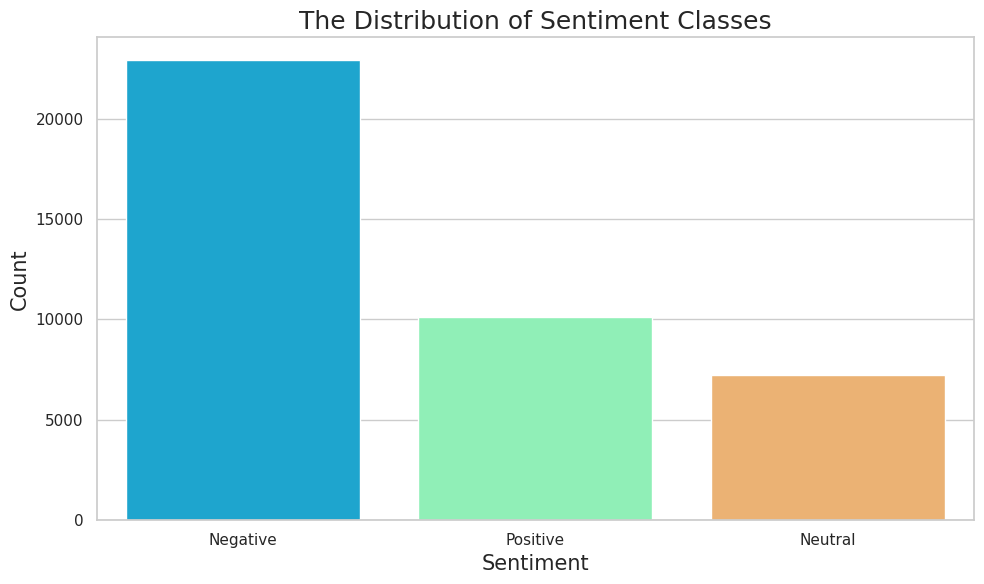

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=reviews, palette='rainbow')
plt.title('The Distribution of Sentiment Classes', fontsize = 18)
plt.xlabel('Sentiment',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.tight_layout()
plt.show()

In [ ]:
data.shape

(50745, 13)

In [ ]:
data['label'].value_counts()

label
Negative    24789
Positive    24320
Neutral      1636
Name: count, dtype: int64

In [ ]:
data = data.drop_duplicates(subset=['content'])
data.shape

(34406, 13)

In [ ]:
data['label'].value_counts()

label
Negative    22906
Positive    10111
Neutral      1389
Name: count, dtype: int64

In [ ]:
# Merge multiples dataset
neu_reviews = pd.concat(map(pd.read_csv, ['final-data/neu_momo.csv', 'final-data/neu_shopeepay.csv', 'final-data/neu_zalopay.csv', 'final-data/neu_vnpay.csv', 'final-data/neu_viettelpay.csv']), ignore_index=True)
neu_reviews.shape

(8159, 12)

In [ ]:
neu_reviews['label'] = neu_reviews['score'].apply(sentiment)

In [ ]:
reviews = pd.concat([data, neu_reviews], ignore_index=True)
reviews.shape

(58904, 13)

In [ ]:
reviews = reviews.drop_duplicates(subset=['content'])
reviews.shape

(40270, 13)

In [ ]:
reviews['label'].value_counts()

label
Negative    22906
Positive    10111
Neutral      7253
Name: count, dtype: int64

In [ ]:
irrelevant_columns = ["reviewId", "userName", "userImage", "reviewCreatedVersion", "repliedAt", "thumbsUpCount", "replyContent", "appVersion"]
reviews = reviews.drop(irrelevant_columns, axis=1)

In [ ]:
# Define list of bad_words that need to removed

bad_words = ['clm', 'dell', 'vc', 'cc', 'vcl', 'vl', 'lol', 'loz', 'l', 'mọe','đm', 'dm', 'zl', 'Dubadeomemay', 'qq', 'má', 'mẹ']

In [ ]:
# Define a word_list dictionary

replace_list = {
    'ô kêi': 'ok', 'okie': 'ok', 'o kê': 'ok', 'okey': 'ok', 'ôkê': 'ok', 'oki': 'ok', 'oke': 'ok', 'okay': 'ok', 'okê': 'ok',
    'tks': 'cảm ơn', 'thks': 'cảm ơn', 'thanks': 'cảm ơn', 'ths': 'cảm ơn', 'thank': 'cảm ơn',
    'kg': 'không', 'not': 'không', 'hk': 'không', 'k': 'không', 'kh': 'không', 'kô': 'không', 'hok': 'không', 'ko': 'không', 'khong': 'không', 'kp': 'không phải',
    'he he': 'tích cực', 'hehe': 'tích cực', 'hihi': 'tích cực', 'haha': 'tích cực', 'hjhj': 'tích cực', 'thick': 'tích cực',
    'lol': 'tiêu cực', 'cc': 'tiêu cực', 'huhu': 'tiêu cực', 'cute': 'dễ thương', 'éo':'không', 'méo':'không',

    'sz': 'size', 'wa': 'quá', 'wá': 'quá', 'qá': 'quá', 'lk' : 'liên kết',
    'đx': 'được', 'dk': 'được', 'dc': 'được', 'đk': 'được', 'đc': 'được', 'dx': 'được', 'ngta':'người ta',
    'vs': 'với', 'j': 'gì', '“': ' ', 'time': 'thời gian', 'm': 'mình', 'mik': 'mình', 'r': 'rồi', 'bjo': 'bao giờ', 'very': 'rất', 'cx' : 'cũng',
    'tk': 'tài khoản', 'mk': 'mật khẩu', 'CCCCD': 'căn cước công dân', 'CMND':'chứng minh nhân dân',

    'authentic': 'chuẩn chính hãng', 'aut': 'chuẩn chính hãng', 'auth': 'chuẩn chính hãng', 'date': 'hạn sử dụng', 'hsd': 'hạn sử dụng',
    'store': 'cửa hàng', 'sop': 'cửa hàng', 'shopE': 'cửa hàng', 'shop': 'cửa hàng',
    'sp': 'sản phẩm', 'product': 'sản phẩm', 'hàg': 'hàng',
    'ship': 'giao hàng', 'delivery': 'giao hàng', 'síp': 'giao hàng', 'order': 'đặt hàng',

    'gud': 'tốt', 'wel done': 'tốt', 'gút': 'tốt', 'tot': 'tốt',
    'chất lg': 'chất lượng', 'chat': 'chất', 'excelent': 'hoàn hảo', 'bt': 'bình thường',
    'sad': 'tệ', 'por': 'tệ', 'poor': 'tệ', 'bad': 'tệ',
    'beautiful': 'đẹp tuyệt vời', 'dep': 'đẹp',
    'xau': 'xấu', 'sấu': 'xấu', 'dell': 'không', 'đell':'không', 'j':'gì', 'đou':'đâu', 'dou':'đâu', 'ngu':'tệ',

    'thik': 'thích', 'iu': 'yêu', 'fake': 'giả mạo',
    'dt': 'điện thoại', 'fb': 'facebook', 'face': 'facebook', 'ks': 'khách sạn', 'nv': 'nhân viên',
    'nt': 'nhắn tin', 'ib': 'nhắn tin', 'tl': 'trả lời', 'trl': 'trả lời', 'rep': 'trả lời',
    'fback': 'feedback', 'fedback': 'feedback',
    'sd': 'sử dụng', 'sài': 'xài', 'như cức':'tệ', 'ch':'chưa', 'xog':'xong',

    '^_^': 'tích cực', ':)': 'tích cực', ':(': 'tiêu cực',
    '❤️': 'tích cực', '👍': 'tích cực', '🎉': 'tích cực', '😀': 'tích cực', '😍': 'tích cực', '😂': 'tích cực', '🤗': 'tích cực', '😙': 'tích cực', '🙂': 'tích cực',
    '😔': 'tiêu cực', '😓': 'tiêu cực',
    '⭐': 'star', '*': 'star', '🌟': 'star', '...':'tiêu cực'
}

In [ ]:
# from pyvi import ViTokenizer

In [ ]:
def clean_text(text):
    for char in string.punctuation: # Add spaces before and after punctuation
        text = text.replace(char, ' ' + char + ' ')

    emoji_pattern = re.compile(pattern="[^\u0000-\uFFFF]",flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text) # Remove emojis
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text)     # Remove digits
    text = text.lower() # Convert to lowercase
    text = rdrsegmenter.word_segment(text) # Word Segmentation
    # text = ViTokenizer.tokenize(text) # Word Segmentation
    text = ', '.join(text)     # Join the text into a string
    return text

In [ ]:
reviews['reviews'] = reviews['content'].apply(clean_text)

NameError: name 'rdrsegmenter' is not defined

In [ ]:
reviews['reviews'][0]

'tại_sao ngân_hàng vpbank e đang liên_kết với momo bị lỗi nạp tiền cũng không dc rút_tiền cũng ko xog'

In [ ]:
reviews['tokenized_text'] = [word.split() for word in reviews['reviews']]

In [ ]:
# Function to replace words using the replace_list dictionary and filter out bad words

def normalize_acronyms(word_list):
    normalized_words = []
    for word in word_list:
        # Replace word if it exists in the replace_list dictionary
        replaced_word = replace_list.get(word, word)
        # Check if the replaced word is not a bad word
        if replaced_word.lower() not in bad_words:
            normalized_words.append(replaced_word)
    return normalized_words

reviews['tokenized'] = reviews['tokenized_text'].apply(normalize_acronyms)

In [ ]:
# Calculate the length of each sentence and store it in a new column
reviews['sentence_length'] = reviews['tokenized'].apply(len)

# Calculate the mean sentence length
max_sentence_length = reviews['sentence_length'].max()
print("Max sentence length:", max_sentence_length)

Max sentence length: 130


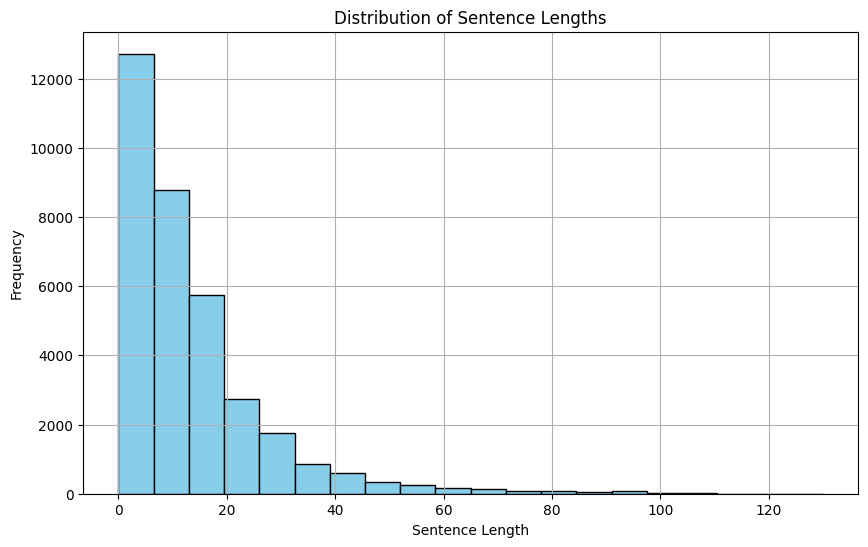

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(reviews['sentence_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Save cleaned data

In [ ]:
reviews['label'].value_counts()

label
Negative    22906
Positive    10111
Neutral      7253
Name: count, dtype: int64

In [ ]:
data = reviews[['reviews', 'label']]
data.head()

,reviews,label
0,tại_sao ngân_hàng vpbank e đang liên_kết với m...,Negative
1,nạp tiền lỗi đợi ngày mới đc xong rút_tiền cũn...,Negative
2,quá tốt khong gì để chê,Positive
3,ok,Positive
4,lag quá,Negative


In [ ]:
data['label'].value_counts()

label
Negative    22906
Positive    10111
Neutral      7253
Name: count, dtype: int64

In [ ]:
data.shape

(34406, 2)

In [ ]:
data.isnull().sum()

reviews    0
label      0
dtype: int64

In [ ]:
data.to_csv("final-data/all_reviews.csv", index=False)

In [ ]:
from unidecode import unidecode

df = data.copy()

def remove_accents(text):
    return unidecode(text)

df['reviews'] = df['reviews'].apply(remove_accents)

In [ ]:
augmented_data = pd.concat([data, df], ignore_index=True)
augmented_data.shape

(80540, 2)

In [ ]:
augmented_data = augmented_data.drop_duplicates(subset=['reviews'])
augmented_data.shape

(75442, 2)

In [ ]:
augmented_data.isnull().sum()

reviews    0
label      0
dtype: int64

In [ ]:
augmented_data['label'].value_counts()

label
Negative    44706
Positive    16793
Neutral     13943
Name: count, dtype: int64

In [ ]:
augmented_data.shape

(75442, 2)

In [ ]:
augmented_data.to_csv("final-data/augmented_data.csv", index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(augmented_data.reviews)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 9958
CPU times: user 2.25 s, sys: 18.1 ms, total: 2.27 s
Wall time: 2.3 s


There are 7137 words in total including single words and words combination

### Exploratory Data Analysis

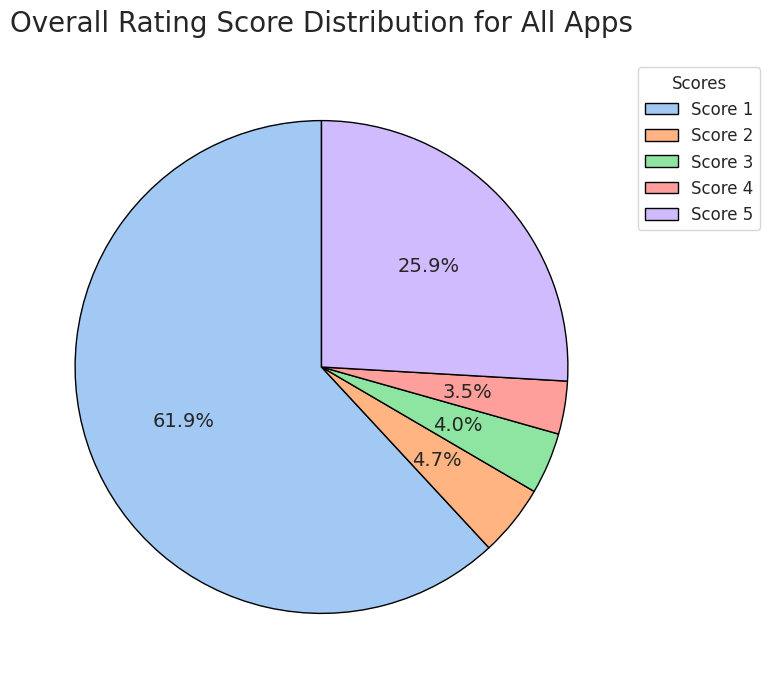

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the overall distribution of scores
score_distribution = data['score'].value_counts().sort_index()

# Apply Seaborn's styling
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")[0:len(score_distribution)]

# Plotting the pie chart for overall score distribution
plt.figure(figsize=(10, 8))
plt.pie(score_distribution, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})

labels = [f'Score {i}' for i in score_distribution.index]
plt.title('Overall Rating Score Distribution for All Apps', fontsize=20, pad=20)
plt.legend(labels, title="Scores", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.show()

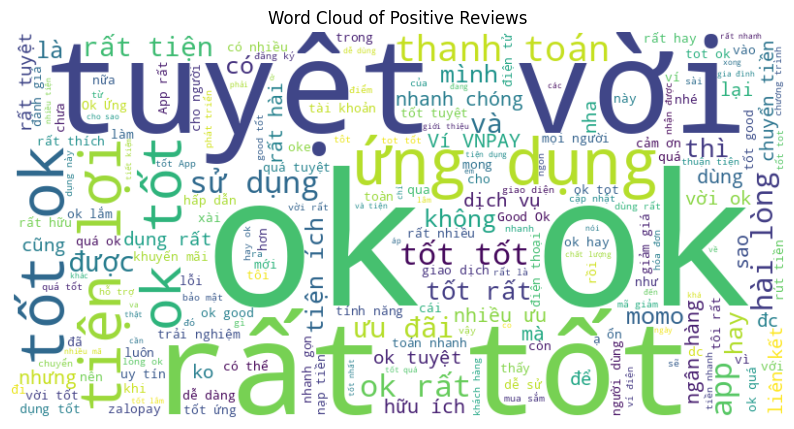

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming data is your DataFrame containing the 'label' and 'reviews' columns
# Filter data for the positive class (assuming positive class is labeled as 1)
positive_reviews = data[data['label'] == 'Positive']['content']

# Combine all the positive reviews into a single string
positive_reviews_text = ' '.join(positive_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews')
plt.axis('off')
plt.show()

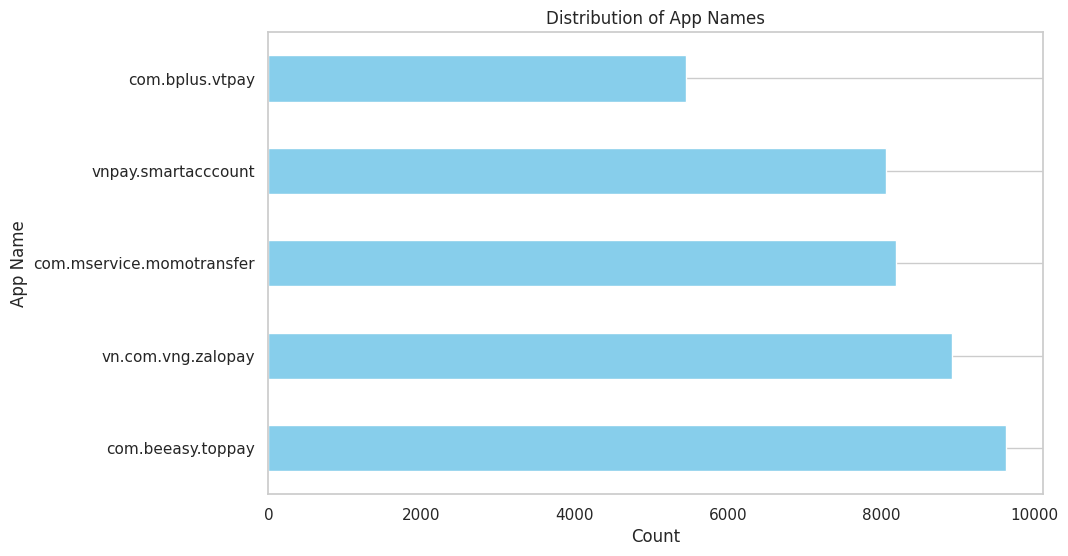

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your DataFrame containing the 'app_name' column
# Count the occurrences of each app_name
app_name_counts = reviews['app_name'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
app_name_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of App Names')
plt.xlabel('Count')
plt.ylabel('App Name')
plt.grid(axis='x')
plt.show()